In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [55]:
import numpy as np
import pandas as pd
from scipy import stats

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct

In [6]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Get a list of column names and types

columns_1 = inspector.get_columns('measurement')
for c in columns_1:
    print(f'{c["name"]} - {c["type"]}')

id - INTEGER
station - TEXT
date - TEXT
prcp - FLOAT
tobs - FLOAT


In [9]:
columns_2 = inspector.get_columns('station')
for c in columns_2:
    print(f'{c["name"]} - {c["type"]}')

id - INTEGER
station - TEXT
name - TEXT
latitude - FLOAT
longitude - FLOAT
elevation - FLOAT


In [10]:
# Start date = 3/26/2021
# End date = 4/4/2021

In [11]:
# reflect an existing database into a new model

# Declare a Base() using automap_base()
Base=automap_base()

In [12]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [13]:
# print all of the classes mapped to the Base

Base.classes.keys()

['measurement', 'station']

In [14]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [15]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [16]:
# check out database
measurements = session.query(Measurement)
for each_measurement in measurements:
    print(each_measurement.id)
    break

1


In [17]:
# Display the row's columns and data in dictionary format
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb20f60c910>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [18]:
first_row_station = session.query(Station).first()
first_row_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb210bef040>,
 'elevation': 3.0,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Climate Analysis

In [19]:
results=session.query(Measurement)

In [20]:
# dates = results.filter(Measurement.date)
for each_result in results.limit(15):
    print(each_result.date)

2010-01-01
2010-01-02
2010-01-03
2010-01-04
2010-01-06
2010-01-07
2010-01-08
2010-01-09
2010-01-10
2010-01-11
2010-01-12
2010-01-14
2010-01-15
2010-01-16
2010-01-17


In [21]:
session.query(Measurement.date).all()

[('2010-01-01'),
 ('2010-01-02'),
 ('2010-01-03'),
 ('2010-01-04'),
 ('2010-01-06'),
 ('2010-01-07'),
 ('2010-01-08'),
 ('2010-01-09'),
 ('2010-01-10'),
 ('2010-01-11'),
 ('2010-01-12'),
 ('2010-01-14'),
 ('2010-01-15'),
 ('2010-01-16'),
 ('2010-01-17'),
 ('2010-01-18'),
 ('2010-01-19'),
 ('2010-01-20'),
 ('2010-01-21'),
 ('2010-01-22'),
 ('2010-01-23'),
 ('2010-01-24'),
 ('2010-01-25'),
 ('2010-01-26'),
 ('2010-01-27'),
 ('2010-01-28'),
 ('2010-01-30'),
 ('2010-01-31'),
 ('2010-02-01'),
 ('2010-02-03'),
 ('2010-02-04'),
 ('2010-02-05'),
 ('2010-02-06'),
 ('2010-02-07'),
 ('2010-02-08'),
 ('2010-02-09'),
 ('2010-02-11'),
 ('2010-02-12'),
 ('2010-02-13'),
 ('2010-02-14'),
 ('2010-02-15'),
 ('2010-02-16'),
 ('2010-02-17'),
 ('2010-02-19'),
 ('2010-02-20'),
 ('2010-02-21'),
 ('2010-02-22'),
 ('2010-02-23'),
 ('2010-02-24'),
 ('2010-02-25'),
 ('2010-02-26'),
 ('2010-02-28'),
 ('2010-03-01'),
 ('2010-03-02'),
 ('2010-03-03'),
 ('2010-03-04'),
 ('2010-03-05'),
 ('2010-03-06'),
 ('2010-03-07'

In [22]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# session.query(Measurement).filter(func.strftime()) >='2020-02-01')\
#     .filter(Measurement.date <='2020-02-01')


# Calculate the date 1 year ago from the last data point in the database
last_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f'Last data point is {last_date}')

year_ago=dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", year_ago)

Last data point is ('2017-08-23',)
Query Date:  2016-08-23


In [23]:
# Perform a query to retrieve the data and precipitation scores
year_prcp=session.query(Measurement.date, Measurement.prcp)\
    .filter(Measurement.date >= year_ago).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(year_prcp).set_index('date')
prcp_df.count()

prcp    2021
dtype: int64

In [24]:
prcp_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [25]:
# Sort the dataframe by date
date_df=prcp_df.sort_values(by='date')
date_df.count()
clean_df=date_df.dropna(how='any')

In [26]:
clean_df.count()

prcp    2021
dtype: int64

In [27]:
date_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
clean_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [35]:
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [29]:
date_df.columns

Index(['prcp'], dtype='object')

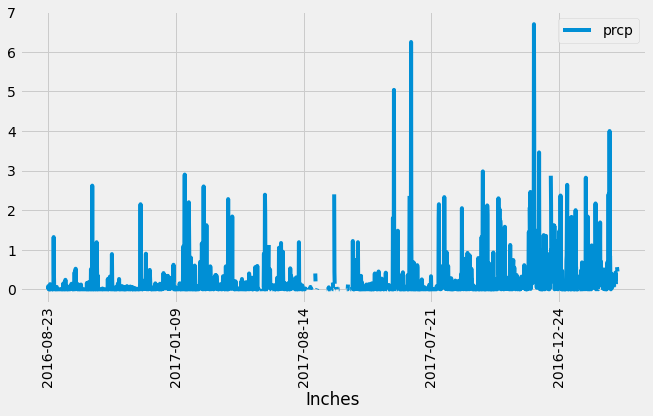

In [34]:
prcp_df.plot(figsize=(10,5), rot=90, x_compat=True)
plt.xlabel('Inches')
plt.show()

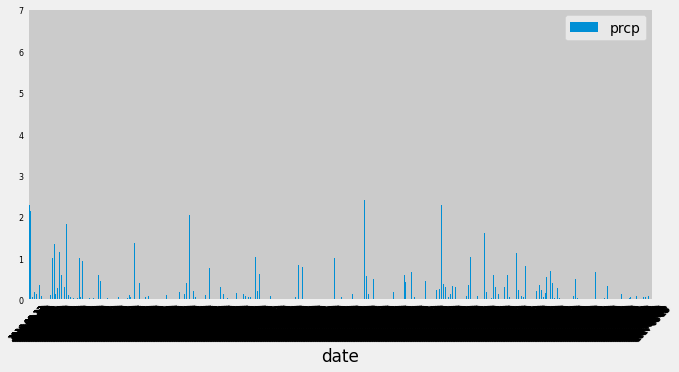

In [32]:
# # Use Pandas Plotting with Matplotlib to plot the data
# date_df.plot(kind='bar', figsize = (10, 5), fontsize=8, rot=45)
# # plt.set_xticks(minor=False)
# # ax.grid('on', which)
# # ax.set_xticks()
# # only grab a range? 
# plt.grid(True)
# plt.show()

In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [34]:
columns_2 = inspector.get_columns('station')
for c in columns_2:
    print(f'{c["name"]} - {c["type"]}')

id - INTEGER
station - TEXT
name - TEXT
latitude - FLOAT
longitude - FLOAT
elevation - FLOAT


In [173]:
# Design a query to show how many stations are available in this dataset?
unique_stations=session.query(Station.station).distinct().count()
print(f'There are {unique_stations} stations available in this dataset')

There are 9 stations available in this dataset


In [79]:
results_station=session.query(Station.id, Station.name, Station.station)
for each_result in results_station:
    print(each_result)

(1, 'WAIKIKI 717.2, HI US', 'USC00519397')
(2, 'KANEOHE 838.1, HI US', 'USC00513117')
(3, 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830')
(4, 'PEARL CITY, HI US', 'USC00517948')
(5, 'UPPER WAHIAWA 874.3, HI US', 'USC00518838')
(6, 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523')
(7, 'WAIHEE 837.5, HI US', 'USC00519281')
(8, 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918')
(9, 'MANOA LYON ARBO 785.2, HI US', 'USC00516128')


In [82]:
session.query(func.count(Measurement.station)).all()

[(19550)]

In [91]:
station_list=session.query(Station.station).distinct().all()

In [180]:
# What are the most active stations? (i.e. what stations have the most rows)?
# # List the stations and the counts in descending order.

active_stations=session.query(Measurement.station, func.count(Measurement.id))\
    .group_by(Measurement.station).order_by(func.count(Measurement.id).desc()).all()


active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [181]:
# Which station has the highest number of observations? 
# Find the max of func.count

print(f'The most active station is {active_stations[0]}')

# session.query(func.max(func.count(Measurement.id)))
         
#              )\
#     .group_by(Measurement.station).func.max(func.count(Measurement.id))

The most active station is ('USC00519281', 2772)


In [182]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# --> find min temp where station = USC00519281
min_temp=session.query(func.min(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').one()

print(f'The minimum temperature at USC00519281 is {min_temp}')

# highest temperature recorded, and 
# --> find max temp where station = USC00519281
max_temp=session.query(func.max(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').one()

print(f'The maximum temperature at USC00519281 is {max_temp}')

# average temperature of the most active station?
# --> find avg temp where station = USC00519281
avg_temp=session.query(func.avg(Measurement.tobs))\
    .filter(Measurement.station=='USC00519281').one()

print(f'The average temperature at USC00519281 is {avg_temp}')

The minimum temperature at USC00519281 is (54.0,)
The maximum temperature at USC00519281 is (85.0,)
The average temperature at USC00519281 is (71.66378066378067,)


In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# filter by station, then filter by date
# year_prcp=session.query(Measurement.date, Measurement.prcp)\
#     .filter(Measurement.date >= year_ago).all()

station_results=session.query(Measurement.tobs)\
                    .filter(Measurement.station=='USC00519281')\
                    .filter(Measurement.date >= year_ago).all()

station_results

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

In [38]:
type(station_results)

list

In [39]:
active_station_temps=[each_result[0] for each_result in station_results]

In [40]:
type(active_station_temps)

list

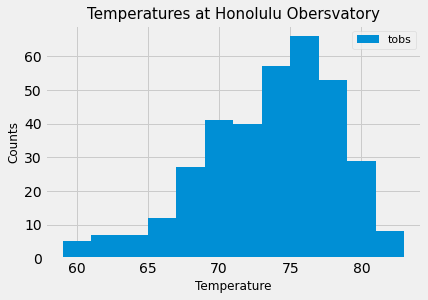

In [41]:
plt.hist(active_station_temps, bins=12, label='tobs')
plt.xlabel('Temperature', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Temperatures at Honolulu Obersvatory', fontsize=15)
plt.legend(loc='best', prop={'size':11})
plt.show()

## Bonus Challenge Assignment

In [42]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


###  Temperature Analysis 1
* Is there a meaningful difference between the temperature in, for example, June and December?

In [50]:
# Identify the average temperature in June at all stations across all available years in the dataset. 
# Do the same for December temperature.

# need to query where m = 06

In [92]:
june_avg_years=session.query(Measurement.date, Measurement.tobs)\
    .filter(func.strftime("%m", Measurement.date) == "06").all()

dec_avg_years=session.query(Measurement.date, Measurement.tobs)\
    .filter(func.strftime("%m", Measurement.date) == "12").all()



In [93]:
june_df=pd.DataFrame(june_avg_years)
june_df.head()

,date,tobs
0,2010-06-01,78.0
1,2010-06-02,76.0
2,2010-06-03,78.0
3,2010-06-04,76.0
4,2010-06-05,77.0


In [94]:
dec_df=pd.DataFrame(dec_avg_years)
dec_df.head()

,date,tobs
0,2010-12-01,76.0
1,2010-12-03,74.0
2,2010-12-04,74.0
3,2010-12-06,64.0
4,2010-12-07,64.0


In [95]:
june_df['date']=pd.to_datetime(june_df['date'])
june_yearly_df=june_df.groupby(june_df['date'].dt.strftime('%Y')).mean()

dec_df['date']=pd.to_datetime(dec_df['date'])
dec_yearly_df=dec_df.groupby(dec_df['date'].dt.strftime('%Y')).mean()

In [96]:
june_yearly_df

,tobs
date,
2010,74.925620
2011,73.938326
2012,74.000000
2013,74.599078
2014,75.027907
2015,74.990148
2016,75.175258
2017,77.219895


In [97]:
dec_yearly_df

,tobs
date,
2010,70.208511
2011,70.820628
2012,71.188073
2013,71.094017
2014,69.896861
2015,73.423913
2016,71.130000


In [98]:
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. 
# Will you use a paired t-test, or an unpaired t-test? Why?
# You will use unpaired because the data is on two different populations(temp in june vs temp in dec)

stats.ttest_ind(june_yearly_df['tobs'], dec_yearly_df['tobs'])

Ttest_indResult(statistic=6.97605237788662, pvalue=9.681543069110451e-06)

In [99]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

# Start date = 3/26/2021
# End date = 4/4/2021
trip_avg_temp=calc_temps('2017-03-26', '2017-04-04')

NameError: name 'calc_temps' is not defined

In [58]:
x_values=['TMIN', 'TAVE', 'TMAX']

In [62]:
type(trip_avg_temp)

list

TypeError: only size-1 arrays can be converted to Python scalars

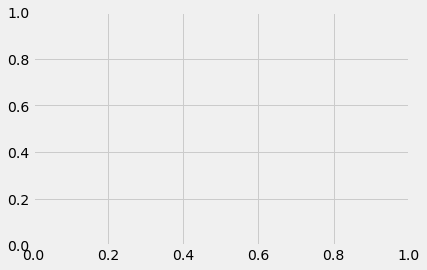

In [64]:
# Plot the results from your previous query as a bar chart. 
plt.bar(x=trip_avg_temp, height=trip_avg_temp)
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
